# Homework 3

https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/cohorts/2023/03-classification/homework.md

In [1]:
import pandas as pd

df = pd.read_csv("data.csv")

df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [2]:
columns_to_keep = [
    "Make", "Model", "Year", "Engine HP", "Engine Cylinders", 
    "Transmission Type", "Vehicle Style", "highway MPG", "city mpg", "MSRP"
]

df = df[columns_to_keep]

df.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [3]:
print(df.columns)

df.columns = df.columns.str.replace(' ', '_').str.lower()

df.head()

Index(['Make', 'Model', 'Year', 'Engine HP', 'Engine Cylinders',
       'Transmission Type', 'Vehicle Style', 'highway MPG', 'city mpg',
       'MSRP'],
      dtype='object')


,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [4]:
print("COLUMNS MISSING VALUES: \n", df.isna().any())

COLUMNS MISSING VALUES: 
 make                 False
model                False
year                 False
engine_hp             True
engine_cylinders      True
transmission_type    False
vehicle_style        False
highway_mpg          False
city_mpg             False
msrp                 False
dtype: bool


In [5]:
df.columns = df.columns.str.replace('msrp', 'price')

df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


### 1. Mode for transmission?

In [6]:
df['transmission_type'].mode()

0    AUTOMATIC
Name: transmission_type, dtype: object

In [7]:
df['transmission_type'].value_counts()

transmission_type
AUTOMATIC           8266
MANUAL              2935
AUTOMATED_MANUAL     626
DIRECT_DRIVE          68
UNKNOWN               19
Name: count, dtype: int64

In [8]:
df['transmission_type'].value_counts().idxmax()

'AUTOMATIC'

import seaborn as sns
import matplotlib.pyplot as plt### 2. Correlation Matrix

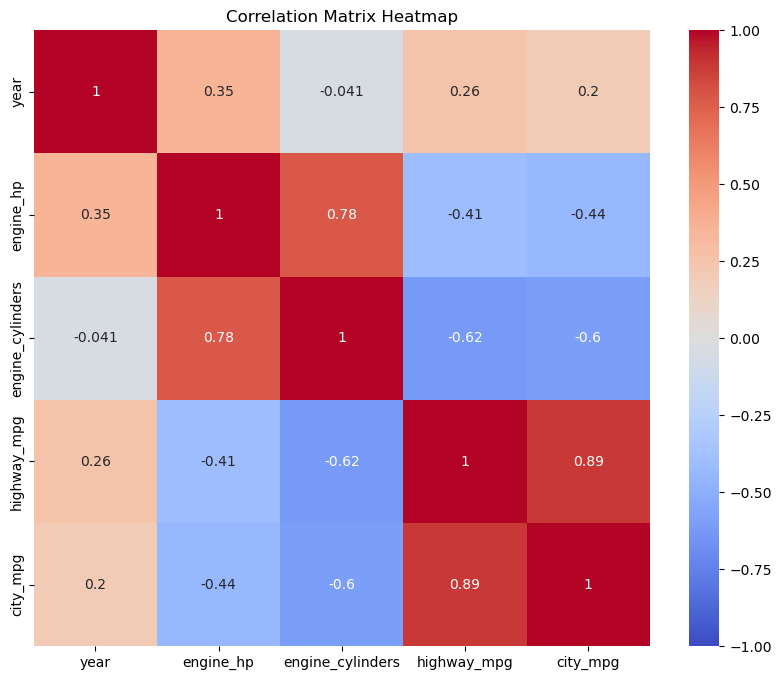

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the numerical features
numerical_features = ['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']

# Compute the correlation matrix
correlation_matrix = df[numerical_features].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()


highway_mpg and city_mpg have the strongest correlation

### 3. Lowest mutual information score

#### Make price binary

Turn the price variable from numeric into a binary format.

Create a variable above_average which is 1 if the price is above its mean value and 0 otherwise.



In [10]:
# Create a new column "above_average" 
# It will be 1 if the price is above the mean, and 0 otherwise
df['above_average'] = (df['price'] > df['price'].mean()).astype(int)

df.head()


,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500,0


#### Split the data

    Split your data in train/val/test sets with 60%/20%/20% distribution.
    Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
    Make sure that the target value (above_average) is not in your dataframe.


In [11]:
from sklearn.model_selection import train_test_split

# Separate the target and the features
X = df.drop('above_average', axis=1)
y = df['above_average']

# Split the data into train and temp sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Split the temp data into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [12]:
from sklearn.preprocessing import OrdinalEncoder


# List of categorical variables
categorical_columns = ['make', 'model', 'transmission_type', 'vehicle_style']

encoder = OrdinalEncoder()
encoded = encoder.fit_transform(X_train[categorical_columns])

encoded_df = pd.DataFrame(encoded, columns=categorical_columns, index=X_train.index)



In [13]:
from sklearn.feature_selection import mutual_info_classif

# Calculate mutual information for each categorical column
mi_scores = []
for column in categorical_columns:
    mi = mutual_info_classif(encoded_df[[column]], y_train)
    mi_scores.append(round(mi[0], 2))

# Combine column names and scores into a DataFrame for display
mi_df = pd.DataFrame({
    'Feature': categorical_columns,
    'MI_Score': mi_scores
}).sort_values('MI_Score')

print(mi_df)



             Feature  MI_Score
2  transmission_type      0.01
3      vehicle_style      0.08
0               make      0.23
1              model      0.42


### 4. Logistic Regression

In [14]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

# Assuming X_train, X_val are already defined from the previous steps

# 1. Use one-hot encoding for categorical variables
encoder = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')  # drop='first' to avoid multicollinearity

# Fit the encoder on the training data and transform both training and validation data
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)

# 2. Train a logistic regression model
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
model.fit(X_train_encoded, y_train)

# 3. Predict on validation set and calculate accuracy
y_pred = model.predict(X_val_encoded)
accuracy = accuracy_score(y_val, y_pred)
rounded_accuracy = round(accuracy, 2)

print(rounded_accuracy)


/Users/home/anaconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/home/anaconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [1, 3, 7, 8, 9] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


0.97


### 5. Feature Elimination

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

# Assume you have already split your data into training and validation sets
# Assume data is stored in X_train, X_val, y_train, y_val

# One-hot encode the categorical variables
encoder = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)

# Train the model
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
model.fit(X_train_encoded, y_train)

# Predict and calculate accuracy
y_pred = model.predict(X_val_encoded)
original_accuracy = accuracy_score(y_val, y_pred)


/Users/home/anaconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/home/anaconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [1, 3, 7, 8, 9] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [16]:
features = ['year', 'engine_hp', 'transmission_type', 'city_mpg']
accuracy_differences = {}

for feature in features:
    # Drop the feature
    X_train_dropped = X_train.drop(feature, axis=1)
    X_val_dropped = X_val.drop(feature, axis=1)

    # One-hot encode the data
    X_train_dropped_encoded = encoder.fit_transform(X_train_dropped)
    X_val_dropped_encoded = encoder.transform(X_val_dropped)

    # Train the model
    model.fit(X_train_dropped_encoded, y_train)
    
    # Predict and calculate accuracy
    y_pred_dropped = model.predict(X_val_dropped_encoded)
    dropped_accuracy = accuracy_score(y_val, y_pred_dropped)

    # Record the difference in accuracy
    accuracy_differences[feature] = original_accuracy - dropped_accuracy

# Find the feature with the smallest difference in accuracy
least_useful_feature = min(accuracy_differences, key=accuracy_differences.get)


/Users/home/anaconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/home/anaconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [1, 2, 6, 7, 8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/home/anaconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/home/anaconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories 

In [17]:
print(least_useful_feature)

transmission_type


### 6. Linear Regression

In [18]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Apply logarithmic transformation to the price column
y_train_log = np.log1p(y_train)
y_val_log = np.log1p(y_val)

# List of alphas to try
alphas = [0, 0.01, 0.1, 1, 10]

# For storing RMSE scores corresponding to each alpha
rmse_scores = []

for alpha in alphas:
    # Initialize and train the Ridge regression model
    model = Ridge(alpha=alpha, solver='sag', random_state=42)
    model.fit(X_train, y_train_log)
    
    # Predict on the validation set
    y_pred = model.predict(X_val)
    
    # Calculate the RMSE for the current alpha
    rmse = mean_squared_error(y_val_log, y_pred, squared=False)
    rmse_scores.append(round(rmse, 3))

# Combine alphas and RMSE scores for display
results = pd.DataFrame({
    'Alpha': alphas,
    'RMSE': rmse_scores
})

print(results)

# Determine the alpha with the smallest RMSE
best_alpha = alphas[np.argmin(rmse_scores)]
print("\nThe best alpha is:", best_alpha)


ValueError: could not convert string to float: 'Nissan'

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

# Assume you have already split your data into training and validation sets
# Assume data is stored in X_train, X_val, y_train, y_val

# Initialize the encoder
encoder = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')

# Fit the encoder using the training data
encoder.fit(X_train)

# One-hot encode the training and validation datasets
X_train_encoded = encoder.transform(X_train)
X_val_encoded = encoder.transform(X_val)

# Train the model with all features
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
model.fit(X_train_encoded, y_train)

# Predict and calculate accuracy
y_pred = model.predict(X_val_encoded)
original_accuracy = accuracy_score(y_val, y_pred)

# Eliminate features and check accuracy difference
features = ['year', 'engine_hp', 'transmission_type', 'city_mpg']
accuracy_differences = {}

for feature in features:
    # Drop the feature
    X_train_dropped = X_train.drop(feature, axis=1)
    X_val_dropped = X_val.drop(feature, axis=1)

    # One-hot encode the data
    X_train_dropped_encoded = encoder.transform(X_train_dropped)
    X_val_dropped_encoded = encoder.transform(X_val_dropped)

    # Train the model
    model.fit(X_train_dropped_encoded, y_train)
    
    # Predict and calculate accuracy
    y_pred_dropped = model.predict(X_val_dropped_encoded)
    dropped_accuracy = accuracy_score(y_val, y_pred_dropped)

    # Record the difference in accuracy
    accuracy_differences[feature] = original_accuracy - dropped_accuracy

# Find the feature with the smallest difference in accuracy
least_useful_feature = min(accuracy_differences, key=accuracy_differences.get)


/Users/home/anaconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/home/anaconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [1, 3, 7, 8, 9] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- year


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

# 1. Train the model using all features

# Initialize and fit the encoder
encoder = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)

# Train the model
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
model.fit(X_train_encoded, y_train)

# Predict and calculate original accuracy
y_pred = model.predict(X_val_encoded)
original_accuracy = accuracy_score(y_val, y_pred)

# 2. Loop through each feature and calculate accuracy differences

features = ['year', 'engine_hp', 'transmission_type', 'city_mpg']
accuracy_differences = {}

for feature in features:
    # Drop the feature
    X_train_dropped = X_train.drop(feature, axis=1)
    X_val_dropped = X_val.drop(feature, axis=1)

    # Re-initialize and fit the encoder using the training data with the dropped feature
    encoder = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')
    encoder.fit(X_train_dropped)

    # One-hot encode the data
    X_train_dropped_encoded = encoder.transform(X_train_dropped)
    X_val_dropped_encoded = encoder.transform(X_val_dropped)

    # Train the model
    model.fit(X_train_dropped_encoded, y_train)
    
    # Predict and calculate accuracy
    y_pred_dropped = model.predict(X_val_dropped_encoded)
    dropped_accuracy = accuracy_score(y_val, y_pred_dropped)

    # Record the difference in accuracy
    accuracy_differences[feature] = original_accuracy - dropped_accuracy

# 3. Find the feature with the smallest difference in accuracy
least_useful_feature = min(accuracy_differences, key=accuracy_differences.get)

print("Original Accuracy:", original_accuracy)
print("Accuracy Differences:", accuracy_differences)
print("Least Useful Feature:", least_useful_feature)


/Users/home/anaconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/home/anaconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [1, 3, 7, 8, 9] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/home/anaconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/home/anaconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories 

Original Accuracy: 0.965589592950063
Accuracy Differences: {'year': 0.00041963911036513313, 'engine_hp': 0.00461603021401602, 'transmission_type': 0.0, 'city_mpg': 0.00041963911036513313}
Least Useful Feature: transmission_type


In [21]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder

# 1. Apply logarithmic transformation to the 'price' column
y_train_log = np.log1p(y_train)
y_val_log = np.log1p(y_val)

# 2. Ridge regression

alphas = [0, 0.01, 0.1, 1, 10]
best_alpha = None
best_rmse = float('inf')

for alpha in alphas:
    # Instantiate Ridge model with given parameters
    model = Ridge(alpha=alpha, solver='sag', random_state=42)
    
    # Fit the model
    model.fit(X_train_encoded, y_train_log)
    
    # Predict on the validation set
    y_pred_log = model.predict(X_val_encoded)
    
    # Calculate RMSE
    rmse = mean_squared_error(y_val_log, y_pred_log, squared=False)
    
    # Check if the RMSE for this alpha is the best so far
    if rmse < best_rmse:
        best_rmse = rmse
        best_alpha = alpha

print(f"Best Alpha: {best_alpha}")
print(f"Best RMSE: {round(best_rmse, 3)}")


/Users/home/anaconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/home/anaconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best Alpha: 0.1
Best RMSE: 0.115
